In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import csv
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
import laUtilities as ut
import seaborn as sns
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [219]:
# Assignment 2 Exercise 1 

# 1.1

X = [] 
with open("X1.dat","r") as f:
    next(f)
    for i in f: 
        split = i.strip().split(",")
        X.append(split)
check = []
for line in X:
    for data in line:
        check.append(float(data))
#print(check)
        
mu = np.mean(check)
std = np.std(check)
final = []
for i in range(len(check)):
    if check[i] > mu +(2*std):
        final.append(check[i])
    if check[i] < mu - (2*std):
        final.append(check[i])
print(final)
print("There are "+ str(len(final)) + " outliers")



X2 = []
with open("X2.dat","r") as f:
    next(f)
    for i in f: 
        split = i.split()
        X2.append(split)


x = []
y = []
for line in X2:
    for point in line:
        x.append(float(line[0]))
        break
for line in X2:
    for point in line:
        y.append(float(line[1]))
        break      

for i in range(len(x)):
    norm = np.sqrt(x[i]**2 + y[i]**2)
    x[i] = x[i]/norm
    y[i] = y[i]/norm
list2 = []
for i in range(len(X2)):
    if x[i]>(np.mean(x) + (3*np.std(x))) or y[i] > (np.mean(y)+(3*np.std(y))):
        list2.append(X2[i])
    if x[i]<(np.mean(x) - (3*np.std(x))) or y[i] < (np.mean(y)-(3*np.std(y))):
        list2.append(X2[i])
print("\n")
print(list2)
print(len(list2))



[-0.5199363888831563, -0.18392043045826334, 0.5170241643464717, 0.5333817711688233, 0.5705589563366367, 20.104721203414197, 9.388753351890307, -0.7421292419792831, 0.20683776947264665, 9.695217337918862, 9.440734000909647, -2.395147527343992, -0.06289474525901184, -0.12456904997836293, 9.22602181694592, -0.523526672645267, 0.3966475380968406, -0.002481092284124742, 0.0726509798463626, 0.0194762274110154, 9.58559986074094, -10.586591188141448, -8.07520595960352, 0.6407050897120445, 0.4210501763712369, -0.15226112262463865, 9.271299950077088, 10.011322961371775, -1.299841918689416, 9.338972267803511, -0.07055178821693175, 0.7100009156632536, 0.5544245777086649, 10.350279679653568, 9.308134173785684, 0.606789858188022, 0.2928156129224915, 9.369195166674057, 0.7013453778316316, -0.6289919422273664, 9.828688831346131, 0.7249377733806757, 20.08073646187272, 0.2449289090356812, 0.5215253082774138, 9.377754745829808, 10.131924290847152, 0.5990520504174199, -0.15730656521609632, -3.022106432739

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.windows.x', 'comp.sys.mac.hardware','comp.graphics','sci.electronics','misc.forsale']
news_data = fetch_20newsgroups(subset='train', categories=categories)

In [3]:
print(news_data.target_names)
print(news_data.target)
print(news_data.filenames)

['comp.graphics', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'sci.electronics']
[4 0 1 ... 4 4 1]
['/Users/chrisr98/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53966'
 '/Users/chrisr98/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38367'
 '/Users/chrisr98/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51802'
 ...
 '/Users/chrisr98/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53702'
 '/Users/chrisr98/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/52809'
 '/Users/chrisr98/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51600']


In [4]:
# import nltk
# nltk.download('snowball_data')
# nltk.download('stopwords')
# nltk.download('punkt')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
dtm = vectorizer.fit_transform(news_data.data)

In [6]:
print(type(dtm), dtm.shape)
terms = vectorizer.get_feature_names()
print(terms)

<class 'scipy.sparse.csr.csr_matrix'> (2931, 9546)
['00', '000', '00r', '01', '02', '020', '0200', '02106', '02139', '02142', '022', '0223', '0235', '03', '030', '0300', '0358', '04', '040', '0400', '0444', '047', '05', '051', '0511', '06', '0608', '07', '0700', '071', '08', '09', '0ha', '0v', '0x0', '10', '100', '1000', '100k', '100mb', '100mhz', '101', '1010', '101010', '102', '1024', '1024x768', '103', '104', '105', '1055', '106', '107', '1070', '108', '109', '10k', '10th', '11', '110', '1100', '111', '112', '113', '114', '1141', '115', '1152x900', '115a', '116', '11632', '117', '1170', '1174', '118', '1185', '119', '12', '120', '1200', '120466', '12091', '120v', '120vac', '121', '1211', '122', '123', '124', '1246', '125', '126', '127', '128', '1280', '12821', '128k', '129', '12am', '12v', '13', '130', '1300', '1304', '131', '132', '133', '134', '135', '136', '137', '138', '139', '13h', '14', '140', '1400', '141', '142', '143', '1430', '1433', '144', '14400', '144750', '144843', '14

In [7]:
#Stemming data
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize


stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
         for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in news_data.data]

# stemmed_data = news_data.data


In [8]:
dtm = vectorizer.fit_transform(stemmed_data)
terms = vectorizer.get_feature_names()
print(terms)

['00', '000', '00r', '01', '02', '020', '0200', '02106', '02139', '02142', '022', '0223', '0235', '03', '030', '0300', '0358', '04', '040', '0400', '0444', '047', '05', '051', '0511', '06', '0608', '07', '0700', '071', '08', '09', '0ha', '0v', '0x0', '10', '100', '1000', '100k', '100mb', '100mhz', '101', '1010', '101010', '102', '1024', '1024x768', '103', '104', '105', '1055', '106', '107', '1070', '108', '109', '10k', '10th', '11', '110', '1100', '111', '112', '113', '114', '1141', '115', '1152x900', '115a', '116', '11632', '117', '1170', '1174', '118', '1185', '119', '12', '120', '1200', '120466', '12091', '120v', '120vac', '121', '1211', '122', '123', '124', '1246', '125', '126', '127', '128', '1280', '12821', '128k', '129', '12am', '12v', '13', '130', '1300', '1304', '131', '132', '133', '134', '135', '136', '137', '138', '139', '13h', '14', '140', '1400', '141', '142', '143', '1430', '1433', '144', '14400', '144750', '144843', '145', '146', '147', '148', '149', '15', '150', '1500'

In [9]:
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
np.sum(centered_dtm,axis=0)[:,:10]

matrix([[-9.54791801e-15, -1.26886349e-14, -2.47631776e-15,
         -3.17363323e-14, -1.25229688e-14,  2.57159203e-15,
         -9.71445147e-16, -3.88859951e-15,  3.25697043e-15,
         -2.30826643e-15]])

In [10]:
u, s, vt = np.linalg.svd(centered_dtm, full_matrices=False)

print(u.shape)
print(s.shape)
print(vt.shape)

(2931, 2931)
(2931,)
(2931, 7817)


In [11]:
pd.DataFrame(vt,columns=vectorizer.get_feature_names())

,00,000,00r,01,02,020,0200,02106,02139,02142,...,zod,zombi,zone,zoo,zoolog,zoom,zterm,zurich,zyeh,zyxel
0,-0.093276,-0.013729,-0.001028,0.003105,0.000207,0.000048,0.002982,-0.007832,-0.000192,0.001182,...,0.001452,0.000745,-0.002335,-0.002303,-0.001352,-0.002615,0.001301,0.002643,-0.000190,-0.000212
1,0.109526,0.001941,-0.001062,0.003800,0.001008,-0.002053,0.000413,0.011250,-0.001045,-0.000168,...,-0.004621,-0.000377,-0.000902,0.000454,0.000257,0.001523,-0.005313,0.000167,0.006919,-0.001736
2,0.014560,0.014360,0.000995,-0.000053,0.002941,0.000796,-0.002621,-0.002341,-0.000956,0.001054,...,0.005764,0.000372,-0.002057,0.007372,0.006919,-0.001266,0.000969,-0.001418,-0.002133,-0.000898
3,-0.362774,-0.023162,0.000356,-0.002729,-0.002081,0.001205,-0.000792,-0.007350,-0.000760,-0.000552,...,-0.001995,-0.002062,-0.004091,0.007514,0.005649,-0.008328,0.000118,-0.001642,0.009028,-0.000030
4,-0.160845,-0.006238,0.000611,-0.010142,-0.003819,-0.000843,0.000862,-0.002537,-0.000528,0.000375,...,-0.001167,-0.000904,-0.003317,0.009426,0.007464,-0.008165,-0.001049,0.002236,0.000601,-0.000889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,-0.003803,0.003459,0.002734,0.082467,-0.034211,0.001158,0.001307,-0.012985,-0.000631,-0.007195,...,0.002006,0.000730,0.004684,-0.002947,0.012127,0.004930,0.014352,-0.006086,0.001242,-0.004106
2927,-0.001177,-0.001627,0.006799,0.013660,-0.012134,0.007656,-0.001488,0.015625,-0.000949,0.013152,...,0.000816,-0.004350,-0.007297,-0.003409,0.009666,-0.003047,0.000385,0.000558,0.000134,0.002316
2928,0.003598,-0.010010,-0.069165,-0.009168,-0.032476,-0.018822,0.028004,-0.000795,0.006045,0.018971,...,0.000037,0.005870,0.009828,0.011699,0.000135,-0.001741,0.007333,0.001354,-0.002938,-0.014279
2929,-0.003195,0.009264,0.027322,-0.000906,-0.039124,-0.011200,0.012254,0.005757,0.003166,0.004955,...,-0.001409,0.009042,-0.006104,-0.001361,0.004127,-0.015702,0.011088,-0.001538,-0.000127,0.011603


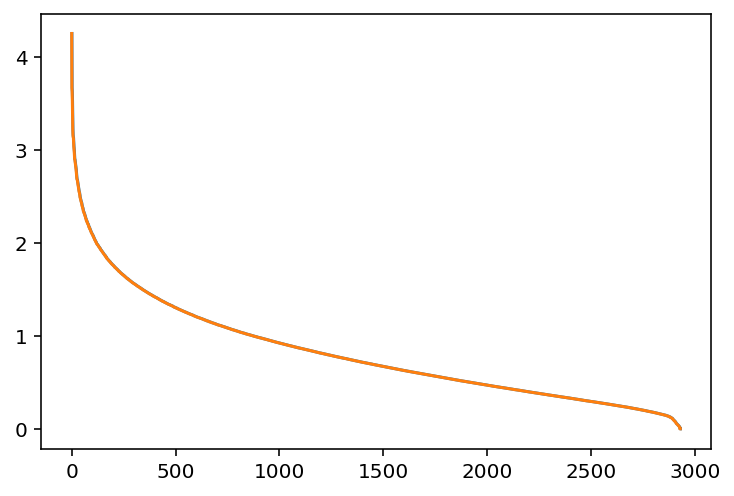

In [23]:
plt.plot(range(1,len(s)+1),s)
plt.plot(s)

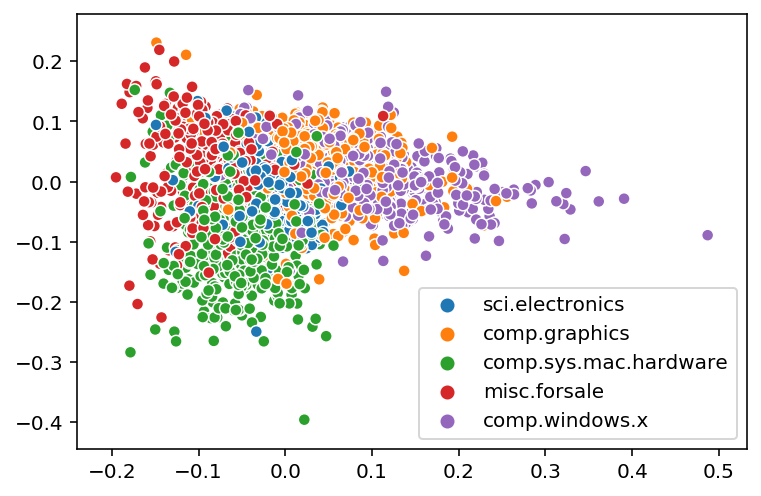

In [16]:
k=70
vectorsk = np.array(u[:,:k] @ np.diag(s[:k]))
labels = [news_data.target_names[i] for i in news_data.target]
sns.scatterplot(x=vectorsk[:,0], y=vectorsk[:, 1], hue=labels)

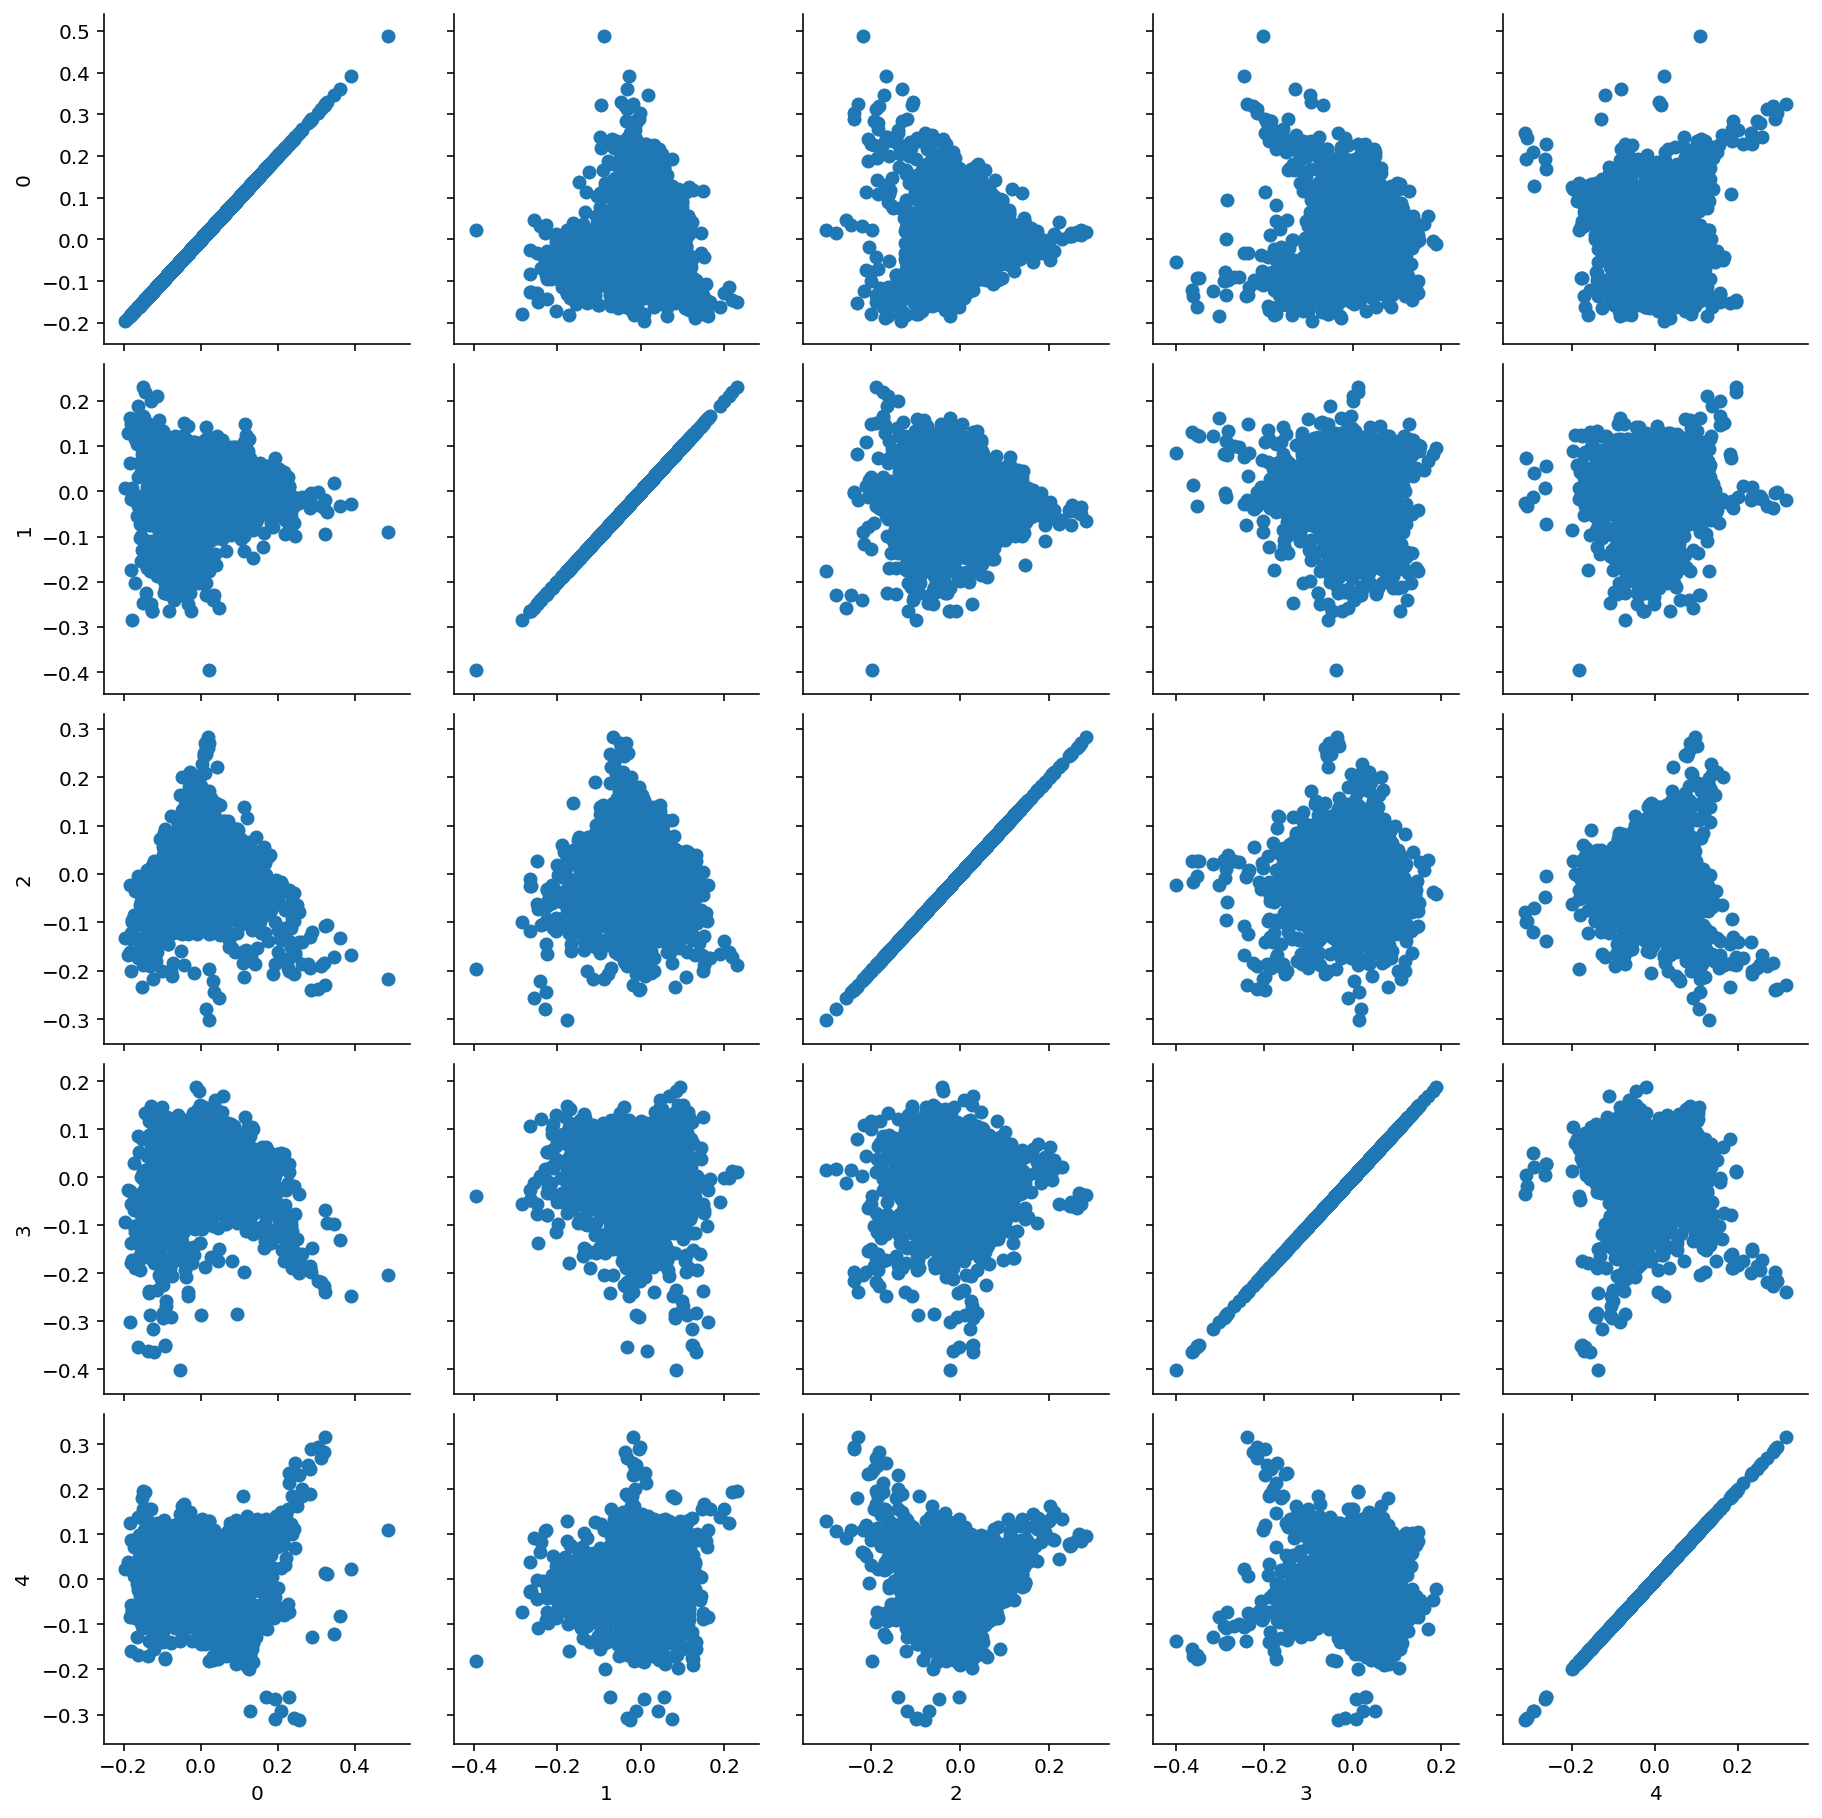

In [232]:
import seaborn as sns
k = 5
Xk = u[:,:k] @ np.diag(s[:k])
X_df = pd.DataFrame(Xk)
g = sns.PairGrid(X_df)
g.map(plt.scatter)


In [233]:
for i in range(6):
    top = np.argsort(vt[i])
    topterms = [terms[top[0,f]] for f in range(12)]
    print (i, topterms)
    
import seaborn as sns
sns.__version__

# '0.10.0'

0 ['edu', 'sale', 'drive', '00', 'ohio', 'offer', 'price', 'simm', 'state', 'ship', 'card', 'univers']
1 ['drive', 'mac', 'appl', 'com', 'problem', 'monitor', 'simm', 'scsi', 'card', 'video', 'color', 'quadra']
2 ['edu', 'window', 'color', 'monitor', 'ohio', 'cwru', 'univers', 'state', 'card', 'appl', 'problem', 'simm']
3 ['00', 'window', 'sale', 'com', 'drive', 'offer', 'includ', 'new', 'disk', 'ship', 'price', 'dos']
4 ['file', 'imag', '00', 'graphic', 'format', 'uk', 'ac', 'program', 'card', 'drive', 'disk', 'packag']
5 ['uk', 'ac', 'drive', 'scsi', 'problem', 'power', 'disk', 'cam', 'hard', 'window', 'amp', 'wire']


'0.10.0'

The limit is 0.5
There are 5 outliers.


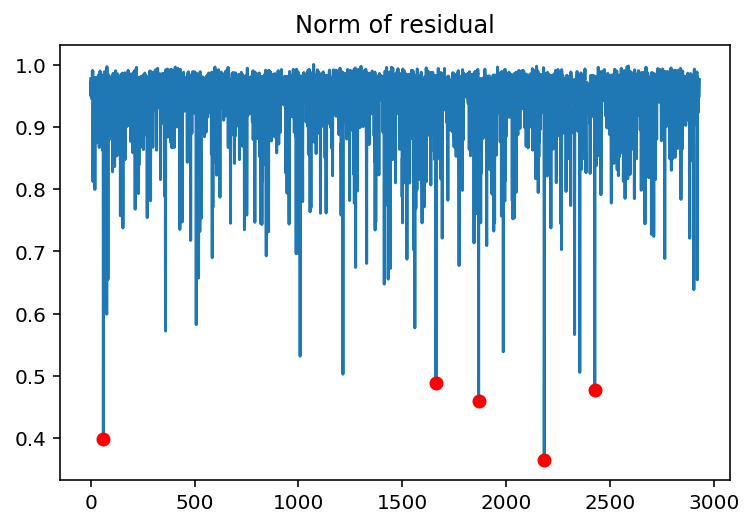

In [26]:
# choose the top 25 columns of U for the normal space
# s[25:]=0
scopy = s.copy()
scopy[25:] = 0.
limit=0.5
N = u @ np.diag(scopy) @(vt)
O = centered_dtm - N
Onorm = np.linalg.norm(O,axis=1)
anomSet = np.where(Onorm<=limit)[0]
print("The limit is "+str(limit))
print("There are "+str(len(anomSet))+" outliers.")
plt.plot(Onorm)
plt.plot(anomSet,Onorm[anomSet],'ro')
_ = plt.title("Norm of residual")

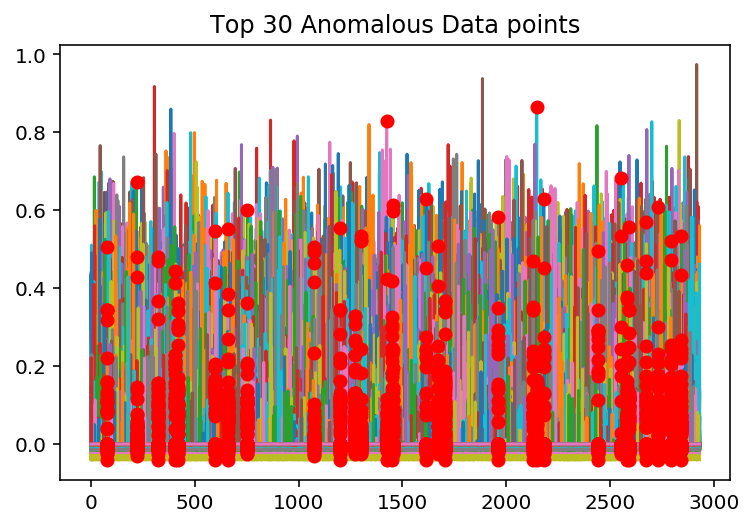

In [27]:
anomSet = np.argsort(Onorm)[-30:]
plt.plot(centered_dtm)
plt.plot(anomSet,centered_dtm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Data points')

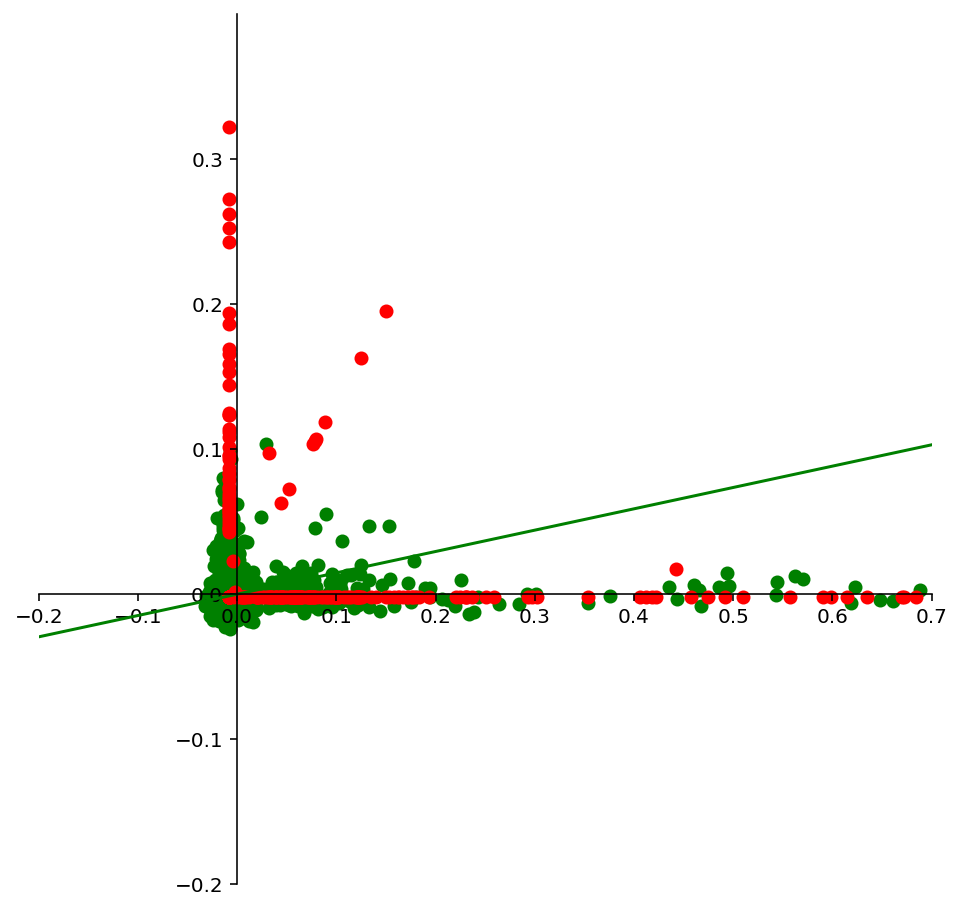

In [235]:
ax = ut.plotSetup(-.2,.7,-.2,.4,(8,8))
ut.centerAxes(ax)
# plt.scatter([O[:,0]], [O[:,1]])
plt.scatter([N[:,0]], [N[:,1]], color='g')
plt.scatter([centered_dtm[:,0]],[centered_dtm[:,1]], color='r')
endpoints = np.array([[-10],[10]]) @ vt[[0],:]
_ = plt.plot(endpoints[:,0], endpoints[:,1], 'g-')
